In [1]:
import requests
import json
import pandas as pd

from urllib.request import urlopen, Request
from bs4 import BeautifulSoup

In [2]:
url_api = 'https://cursos.alura.com.br/api/categorias'
req = requests.get(url_api)
if req.status_code == 200:
    dados_api = req.json()
else:
    print('Sem resposta!')

In [3]:
url_alura = 'https://cursos.alura.com.br/forum'

In [4]:
for categoria in dados_api:
    print(f"{categoria['nome']} - {url_alura}/categoria-{categoria['slug']}/sem-resposta")

Mobile - https://cursos.alura.com.br/forum/categoria-mobile/sem-resposta
Programação - https://cursos.alura.com.br/forum/categoria-programacao/sem-resposta
Front-end - https://cursos.alura.com.br/forum/categoria-front-end/sem-resposta
DevOps - https://cursos.alura.com.br/forum/categoria-devops/sem-resposta
UX & Design - https://cursos.alura.com.br/forum/categoria-design-ux/sem-resposta
Data Science - https://cursos.alura.com.br/forum/categoria-data-science/sem-resposta
Marketing Digital - https://cursos.alura.com.br/forum/categoria-marketing-digital/sem-resposta
Inovação & Gestão - https://cursos.alura.com.br/forum/categoria-inovacao-gestao/sem-resposta


In [5]:
for categoria in dados_api:
    for subcategoria in categoria['subcategorias']:
        print(f"{subcategoria['nome']} - {url_alura}/subcategoria-{subcategoria['slug']}/sem-resposta")
    print(f"Sem subcategoria - {categoria['nome']} - {url_alura}/categoria-{categoria['slug']}/sem-resposta")

Multiplataforma - https://cursos.alura.com.br/forum/subcategoria-multiplataforma/sem-resposta
Flutter - https://cursos.alura.com.br/forum/subcategoria-flutter-mobile/sem-resposta
Android - https://cursos.alura.com.br/forum/subcategoria-android/sem-resposta
iOS - https://cursos.alura.com.br/forum/subcategoria-ios/sem-resposta
Jogos - https://cursos.alura.com.br/forum/subcategoria-jogos/sem-resposta
Sem subcategoria - Mobile - https://cursos.alura.com.br/forum/categoria-mobile/sem-resposta
Lógica de programação - https://cursos.alura.com.br/forum/subcategoria-logica-de-programacao/sem-resposta
Python - https://cursos.alura.com.br/forum/subcategoria-python/sem-resposta
Node.JS - https://cursos.alura.com.br/forum/subcategoria-node-js/sem-resposta
Python web - https://cursos.alura.com.br/forum/subcategoria-python-web/sem-resposta
Java para Web - https://cursos.alura.com.br/forum/subcategoria-java-para-web/sem-resposta
Java - https://cursos.alura.com.br/forum/subcategoria-java/sem-resposta
J

In [6]:
def acessar_url(url):
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.90 Safari/537.36'}
    req = Request(url, headers = headers)
    response = urlopen(req)
    html = response.read().decode('utf-8')
    soup = BeautifulSoup(html, 'html.parser')
    return soup

In [7]:
def contagem_topicos(tipo):
    try:
        ult_pag = soup.find('nav', {'class' :'busca-paginacao-links'}).get_text().split()[-1]
        if tipo == 'Subcategoria':
            url = f"{url_alura}/subcategoria-{subcategoria['slug']}/sem-resposta/{ult_pag}"
        elif tipo == 'Área de estudo':
            url = f"{url_alura}/categoria-{categoria['slug']}/sem-resposta/{ult_pag}"
        soupcatult = acessar_url(url)
        num_top = len(soupcatult.find_all('div', {'class': {'forumList-item-subject'}}))
        num_ult_pag = int(ult_pag)
        qtd_topicos = (num_top + (num_ult_pag-1)*20)
        if tipo == 'Subcategoria':
            linha['qtd_topicos'] = qtd_topicos
        elif tipo == 'Área de estudo':
            soma_sub = int(tabela_areas_estudo.query(f"area_estudo =='{categoria['nome']}'")['qtd_topicos'])
            linha['qtd_topicos'] = qtd_topicos - soma_sub
    except:
        qtd_topicos = len(soup.find_all('div', {'class': {'forumList-item-subject'}}))
        if tipo == 'Subcategoria':
            linha['qtd_topicos'] = qtd_topicos
        elif tipo == 'Área de estudo':
            soma_sub = int(tabela_areas_estudo.query(f"area_estudo =='{categoria['nome']}'")['qtd_topicos'])
            linha['qtd_topicos'] = qtd_topicos - soma_sub

In [8]:
dados = []
for categoria in dados_api:
    dataframe = []
    for subcategoria in categoria['subcategorias']:
        linha = {}
        linha['categoria'] = subcategoria['nome']
        linha['area_estudo'] = categoria['nome']
        url = f"{url_alura}/subcategoria-{subcategoria['slug']}/sem-resposta"
        soup = acessar_url(url)
        contagem_topicos('Subcategoria')
        dataframe.append(linha)
        dados.append(linha)
    tabela_areas_estudo = pd.DataFrame(dataframe)
    tabela_areas_estudo = tabela_areas_estudo.groupby('area_estudo').sum().sort_values(by='qtd_topicos',ascending=False)
    linha = {}
    linha['categoria'] = f"Sem subcategoria - {categoria['nome']}"
    linha['area_estudo'] = categoria['nome']
    url = f"{url_alura}/categoria-{categoria['slug']}/sem-resposta"
    soup = acessar_url(url)
    contagem_topicos('Área de estudo')
    dados.append(linha)
    
dados = pd.DataFrame(dados)
dados.to_csv('./dados/topicos_sem_resposta.csv', sep = ',', index = False,encoding='utf-8-sig')
dados

,categoria,area_estudo,qtd_topicos
0,Multiplataforma,Mobile,23
1,Flutter,Mobile,0
2,Android,Mobile,2
3,iOS,Mobile,7
4,Jogos,Mobile,3
...,...,...,...
115,Práticas de Gestão - Waterfall & Híbridas,Inovação & Gestão,2
116,Marketing Pessoal,Inovação & Gestão,13
117,Conformidade Legal,Inovação & Gestão,0
118,Certificações ANBIMA,Inovação & Gestão,18


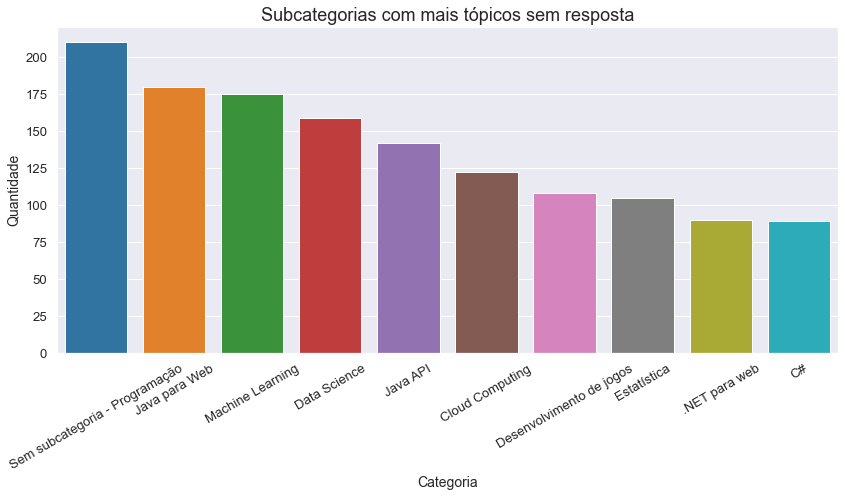

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

dados.sort_values(by= 'qtd_topicos', ascending=False, inplace=True)

sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.2)
ax = sns.barplot(x= 'categoria', y='qtd_topicos', data = dados.head(10))
ax.figure.set_size_inches(14,6)
ax.set_title('Subcategorias com mais tópicos sem resposta', fontsize = 18)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.set_xlabel('Categoria', fontsize = 14)
plt.xticks(rotation=30);

In [10]:
dados.head(10)

,categoria,area_estudo,qtd_topicos
39,Sem subcategoria - Programação,Programação,210
10,Java para Web,Programação,180
80,Machine Learning,Data Science,175
78,Data Science,Data Science,159
13,Java API,Programação,142
55,Cloud Computing,DevOps,122
33,Desenvolvimento de jogos,Programação,108
85,Estatística,Data Science,105
19,.NET para web,Programação,90
18,C#,Programação,89


In [11]:
dados['qtd_topicos'].sum()

3440

In [12]:
tabela_areas_estudo = dados.groupby('area_estudo').sum().sort_values(by='qtd_topicos',ascending=False)
tabela_areas_estudo

,qtd_topicos
area_estudo,
Programação,1673
Data Science,592
Inovação & Gestão,427
DevOps,395
Marketing Digital,149
UX & Design,108
Front-end,60
Mobile,36


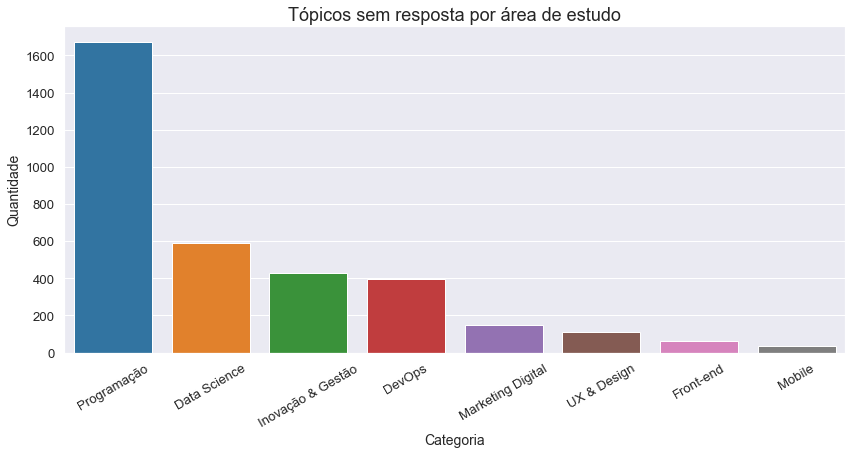

In [13]:
sns.set_style('darkgrid')
sns.set_context("notebook", font_scale=1.2)
ax = sns.barplot(x= tabela_areas_estudo.index, y='qtd_topicos', data = tabela_areas_estudo)
ax.figure.set_size_inches(14,6)
ax.set_title('Tópicos sem resposta por área de estudo', fontsize = 18)
ax.set_ylabel('Quantidade', fontsize = 14)
ax.set_xlabel('Categoria', fontsize = 14)
plt.xticks(rotation=30);